In [5]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import img_as_float, exposure
from skimage.io import imread, imread_collection
from skimage.feature import hog
from skimage.transform import ProjectiveTransform
from skimage.feature import corner_harris, corner_peaks

from image import get_patch
from vis import plot_images, plot_with_keypoints
from tools import invert_coords
from tools import trim_coords_to_shape, get_keypoints

from ExposureDescriptor import ExposureDescriptor

%matplotlib inline

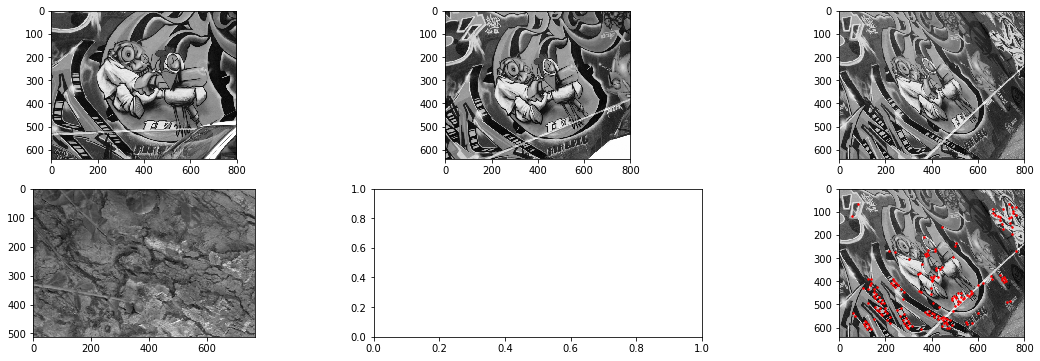

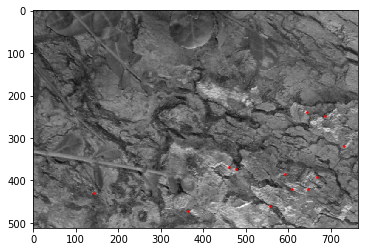

In [13]:
H1to2 = np.loadtxt('images/viewpoint-1/H1to2p')
H1to3 = np.loadtxt('images/viewpoint-1/H1to3p')
H1to4 = np.loadtxt('images/viewpoint-1/H1to4p')
H1to5 = np.loadtxt('images/viewpoint-1/H1to5p')
H1to6 = np.loadtxt('images/viewpoint-1/H1to6p')

img1 = imread('images/viewpoint-1/img1.ppm', as_grey=True)
img2 = imread('images/viewpoint-1/img2.ppm', as_grey=True)
img3 = imread('images/viewpoint-1/img4.ppm', as_grey=True)
coords3 = get_keypoints(img3)
img4 = imread('images/zoom-rotation-1/img1.ppm', as_grey=True)
coords4 = get_keypoints(img4)

plot_images([img1, img2, img3, img4])
plot_with_keypoints(img3, coords3)
plot_with_keypoints(img4, coords4)

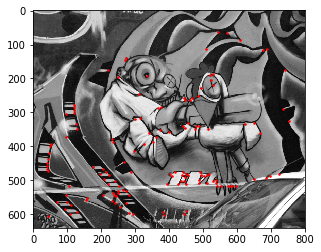

In [7]:
coords = get_keypoints(img1)
plot_with_keypoints(img1, coords)

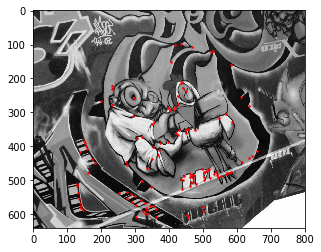

In [8]:
trans = ProjectiveTransform(H1to2)
coords2 = trim_coords_to_shape(img2.shape, trans(coords))
plot_with_keypoints(img2, coords2)

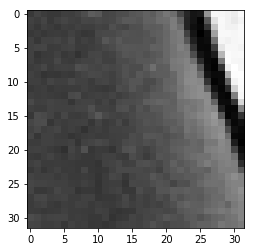

In [9]:
patch = get_patch(img1, coords[12], size=(32, 32))
plt.imshow(patch, cmap='gray')

[415.94240347 102.16599885]


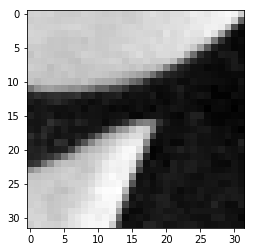

In [6]:
print(coords2[0])
patch2 = get_patch(img2, [coords2[0, 1], coords2[0, 0]], size=(32, 32))
plt.imshow(patch2, cmap='gray')

In [7]:
nbins = 10
hist1, _ = exposure.histogram(patch, nbins=nbins)
hist2, _ = exposure.histogram(patch2, nbins=nbins)

np.abs(hist1 - hist2).sum() / (nbins * 256)

0.66796875

In [14]:
exp_desc = ExposureDescriptor()
desc1 = exp_desc.extract(img1, coords)
desc2 = exp_desc.extract(img2, coords2)
desc3 = exp_desc.extract(img3, coords3)
desc4 = exp_desc.extract(img4, coords4)

print(exp_desc.distance(desc1, desc2))
print(exp_desc.distance(desc1, desc3))
print(exp_desc.distance(desc1, desc4))
print(exp_desc.distance(desc2, desc3))

0.13086218525179857
0.11198204419889501
0.26687275179856107
0.11493007596685084
